# The Sparks Foundation-Graduation Rotational Internship Program(2020)
# Task 2-Simple Linear Regression





In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [70]:
#importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# 1.Reading Data

In [3]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 2.Exploring the Data

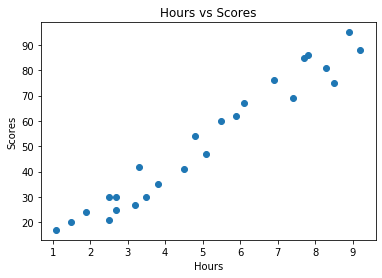

In [48]:
plt.scatter(df.Hours,df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours vs Scores")
plt.show()

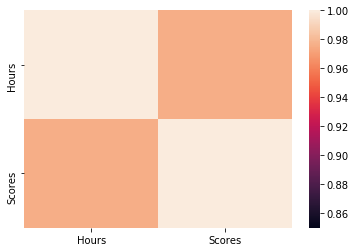

In [71]:
sb.heatmap(df.corr(),vmin=0.85,vmax=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# 3.Making the Model


We will be using Linear Regression to create a predictive model for the data

First we will be creating a Training and Testing set of our data.

In [10]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# Creating and Training the model.

In [67]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
accuracy_score=r2_score(y_test,y_hat)
print("Training Complete")
print("The accuracy score is:",accuracy_score)

Training Complete
The accuracy score is: 0.9454906892105356


In [78]:
print("The coefficient is:",lr.coef_[0])
print("The intercept is:",lr.intercept_)

The coefficient is: 9.910656480642237
The intercept is: 2.018160041434683


In [17]:
line=lr.coef_*X+lr.intercept_

# Plotting our regression line along with the data.

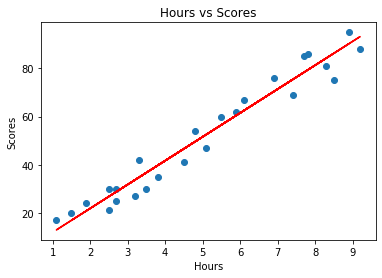

In [81]:
plt.scatter(X,y)
plt.plot(X,line,c='r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

# Evaluating our model

In [83]:
print(accuracy_score*100)

94.54906892105356


In [58]:
df1=pd.DataFrame({'Actual':y_test,'Prediction':y_hat})

In [59]:
df1

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


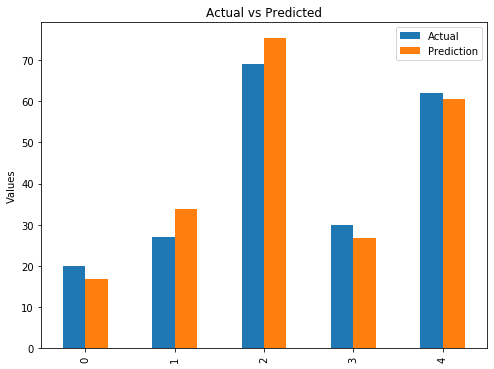

In [91]:
df1.plot(kind='bar',figsize=(8,6))
plt.grid(which='minor',linestyle=":",linewidth='0.5',color='black')
plt.title("Actual vs Predicted")
plt.ylabel('Values')
plt.show()

# Making Prediction

In [60]:
hours=9.25
prediction_=lr.predict([[hours]])
prediction_
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction_[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the Loss

In [93]:
Error=mean_absolute_error(y_test,y_hat)
print(Error)

4.183859899002975
